### Import Libraries

In [76]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

%matplotlib inline
warnings.simplefilter('ignore')

### Load the Data for Analysis

In [3]:
path = './Sales_Data'

files = glob.glob(path+'/*.csv')
dfs = []

for file in files:
    dfs.append(pd.read_csv(file))
    
data_df= pd.concat(dfs, ignore_index=True)    
data_df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
154723,295603,Lightning Charging Cable,1,14.95,11/08/19 19:55,"485 Wilson St, New York City, NY 10001"
140802,282315,27in 4K Gaming Monitor,1,389.99,11/30/19 19:31,"168 13th St, San Francisco, CA 94016"
78790,224374,Lightning Charging Cable,1,14.95,07/08/19 13:33,"883 Lake St, San Francisco, CA 94016"
120718,194310,AA Batteries (4-pack),2,3.84,05/05/19 09:57,"126 Church St, Seattle, WA 98101"
97863,215833,34in Ultrawide Monitor,1,379.99,06/15/19 16:06,"822 6th St, San Francisco, CA 94016"
173718,277414,AA Batteries (4-pack),1,3.84,10/28/19 20:58,"833 Church St, New York City, NY 10001"
72037,145496,Bose SoundSport Headphones,1,99.99,01/11/19 15:54,"875 Cherry St, Seattle, WA 98101"
175655,248626,AAA Batteries (4-pack),1,2.99,09/10/19 10:34,"340 13th St, Dallas, TX 75001"
149328,290450,Wired Headphones,1,11.99,11/25/19 20:54,"124 9th St, Los Angeles, CA 90001"
148832,289980,Flatscreen TV,1,300,11/01/19 09:49,"393 Lake St, San Francisco, CA 94016"


### Data Cleaning and Wrangling

In [4]:
data_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
data_df['Price Each'] = pd.to_numeric(data_df['Price Each'], errors='coerce')
data_df['Quantity Ordered'] = pd.to_numeric(data_df['Quantity Ordered'], errors='coerce')

In [6]:
data_null = data_df[data_df.isna().any(axis=1)]
data_null

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
519,Order ID,Product,NaN,NaN,Order Date,Purchase Address
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,NaN,NaN,Order Date,Purchase Address
...,...,...,...,...,...,...
186548,NaN,NaN,NaN,NaN,NaN,NaN
186563,Order ID,Product,NaN,NaN,Order Date,Purchase Address
186632,Order ID,Product,NaN,NaN,Order Date,Purchase Address
186738,Order ID,Product,NaN,NaN,Order Date,Purchase Address


In [7]:
data_df = data_df.dropna(how='any')

In [8]:
data_df['sales'] = data_df['Price Each'] * data_df['Quantity Ordered']
data_df.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95
7,176563,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",99.99
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",11.95
9,176565,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",1700.00
10,176566,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",11.99


## ASKING AND ANSWERING QUESTIONS

In [9]:
data_df['month'] = data_df['Order Date'].apply (lambda x: str(x)[:2])
data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04


In [10]:
monthly = data_df.groupby('month')['sales'].sum()
monthly

month
01    1.822257e+06
02    2.202022e+06
03    2.807100e+06
04    3.390670e+06
05    3.152607e+06
06    2.577802e+06
07    2.647776e+06
08    2.244468e+06
09    2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

### Best Month Sales

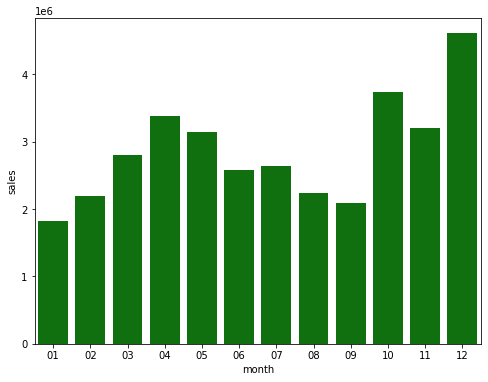

In [77]:
plt.figure(figsize=(8,6))
sns.barplot(x=monthly.index, y=monthly, color='g');

##### December, October and April recorded the highest sales

### Sales Per City(State)
##### Best performing cities

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [13]:
data_df['Address'] = data_df['Purchase Address'].apply(lambda x: get_city(x)+'('+get_state(x) +')')
data_df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,Address
12502,188481,USB-C Charging Cable,1.0,11.95,04/24/19 22:53,"177 Madison St, New York City, NY 10001",11.95,04,New York City(NY)
117241,173444,Wired Headphones,1.0,11.99,03/16/19 22:31,"50 Maple St, Seattle, WA 98101",11.99,03,Seattle(WA)
14326,190218,USB-C Charging Cable,1.0,11.95,04/30/19 17:46,"510 Jackson St, Dallas, TX 75001",11.95,04,Dallas(TX)
125991,199324,27in 4K Gaming Monitor,1.0,389.99,05/27/19 13:03,"607 5th St, Atlanta, GA 30301",389.99,05,Atlanta(GA)
7105,183338,AA Batteries (4-pack),1.0,3.84,04/22/19 22:53,"772 Lincoln St, Boston, MA 02215",3.84,04,Boston(MA)
76539,149806,Apple Airpods Headphones,1.0,150.00,01/15/19 12:52,"39 Ridge St, Boston, MA 02215",150.00,01,Boston(MA)
177365,250259,Apple Airpods Headphones,1.0,150.00,09/23/19 11:08,"759 Church St, New York City, NY 10001",150.00,09,New York City(NY)
152983,293950,27in FHD Monitor,1.0,149.99,11/17/19 22:08,"992 Maple St, San Francisco, CA 94016",149.99,11,San Francisco(CA)
109423,165961,Lightning Charging Cable,1.0,14.95,03/11/19 11:00,"589 7th St, San Francisco, CA 94016",14.95,03,San Francisco(CA)
141063,282568,27in FHD Monitor,1.0,149.99,11/25/19 07:24,"958 Center St, Boston, MA 02215",149.99,11,Boston(MA)


In [14]:
per_state = data_df.groupby('Address')['sales'].sum()
per_state

Address
 Atlanta(GA)          2.795499e+06
 Austin(TX)           1.819582e+06
 Boston(MA)           3.661642e+06
 Dallas(TX)           2.767975e+06
 Los Angeles(CA)      5.452571e+06
 New York City(NY)    4.664317e+06
 Portland(ME)         4.497583e+05
 Portland(OR)         1.870732e+06
 San Francisco(CA)    8.262204e+06
 Seattle(WA)          2.747755e+06
Name: sales, dtype: float64

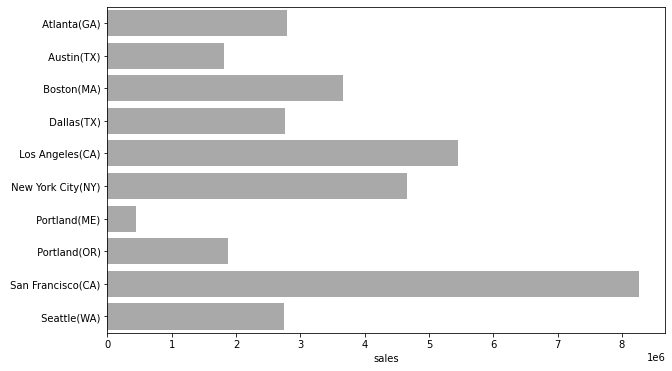

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(y=per_state.index, x=per_state, color='darkgray')
plt.ylabel(None);

### At what time should the company do ADs for more sales?

In [16]:
data_df['Order Date'] = pd.to_datetime(data_df['Order Date'])
data_df['Hour'] = data_df['Order Date'].dt.hour
data_df.tail(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,Address,Hour
186840,259349,AAA Batteries (4-pack),1.0,2.99,2019-09-01 22:14:00,"911 River St, Dallas, TX 75001",2.99,09,Dallas(TX),22
186841,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,09,San Francisco(CA),13
186842,259350,USB-C Charging Cable,1.0,11.95,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",11.95,09,San Francisco(CA),13
186843,259351,Apple Airpods Headphones,1.0,150.00,2019-09-01 19:43:00,"981 4th St, New York City, NY 10001",150.00,09,New York City(NY),19
186844,259352,USB-C Charging Cable,1.0,11.95,2019-09-07 15:49:00,"976 Forest St, San Francisco, CA 94016",11.95,09,San Francisco(CA),15
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,09,Los Angeles(CA),20
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09,San Francisco(CA),16
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,09,San Francisco(CA),7
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,09,San Francisco(CA),17
186849,259357,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",11.95,09,San Francisco(CA),0


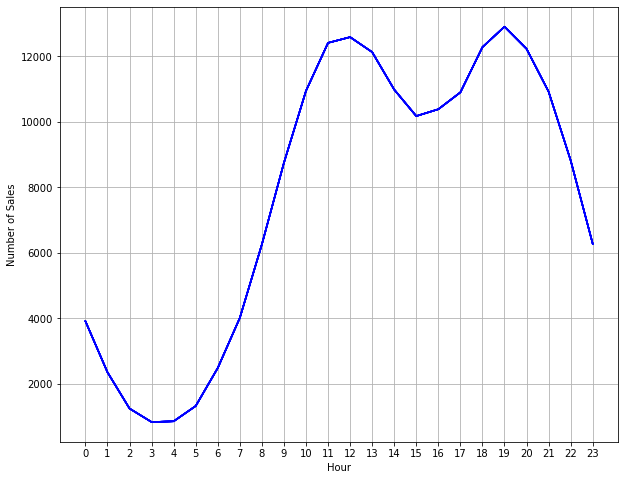

In [18]:
hours = [hour for hour, df in data_df.groupby('Hour')]

plt.figure(figsize=(10,8))
plt.plot(hours, data_df.groupby(['Hour']).count(), color='b')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
plt.xticks(hours)
plt.grid();

###### Best hours to show ads would be before peak hours which is before 1100Hrs and 1800Hrs

### Q:  Which Products sold the most?

In [58]:
most_selling = (data_df.groupby('Product')['sales'].sum().sort_values(ascending=False))/34492035.97*100
most_selling = np.round(most_selling, decimals= 2)
most_selling

Product
Macbook Pro Laptop            23.30
iPhone                        13.90
ThinkPad Laptop               11.97
Google Phone                   9.62
27in 4K Gaming Monitor         7.06
34in Ultrawide Monitor         6.83
Apple Airpods Headphones       6.81
Flatscreen TV                  4.19
Bose SoundSport Headphones     3.90
27in FHD Monitor               3.28
Vareebadd Phone                2.40
20in Monitor                   1.32
LG Washing Machine             1.16
LG Dryer                       1.12
Lightning Charging Cable       1.01
USB-C Charging Cable           0.83
Wired Headphones               0.71
AA Batteries (4-pack)          0.31
AAA Batteries (4-pack)         0.27
Name: sales, dtype: float64

In [47]:
data_df['sales'].sum()

34492035.97

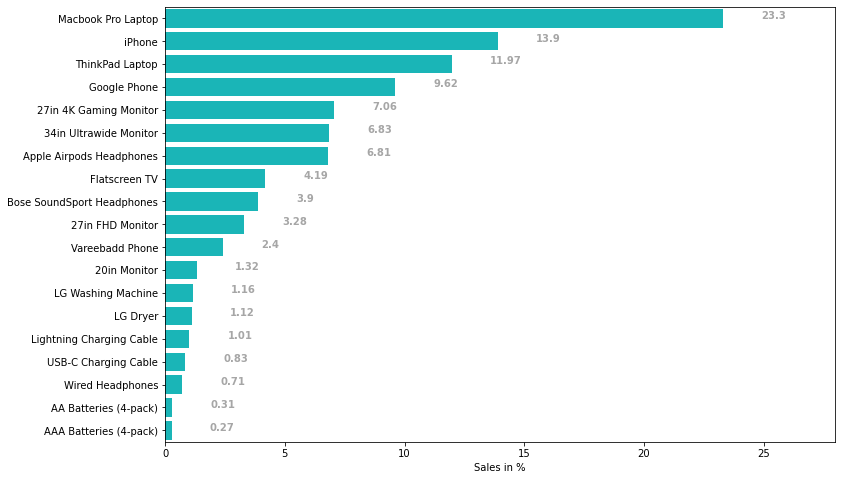

In [74]:
plt.figure(figsize=(12,8))
sns.color_palette('crest', as_cmap=True)
sns.barplot(y=most_selling.index, x=most_selling, color='darkturquoise')
plt.ylabel(None)
plt.xlabel('Sales in %')
plt.xlim(0,np.max(most_selling)*1.2)

for i, v in enumerate(most_selling):
    plt.text(v + 1.6, i, str(v), color='grey', fontweight='bold', alpha=0.7);

### Q: Products that are mostly sold together
     Products with the same Order id

In [21]:
duplicate_df = data_df[data_df['Order ID'].duplicated(keep=False)]
duplicate_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,Address,Hour
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles(CA),14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles(CA),14
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles(CA),19
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,04,Los Angeles(CA),19
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,04,Boston(MA),11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,09,Atlanta(GA),20
186803,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,09,Atlanta(GA),0
186804,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,09,Atlanta(GA),0
186841,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,09,San Francisco(CA),13


In [25]:
duplicate_df['Grouped'] = duplicate_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicate_df.head(10)
                   

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,Address,Hour,Grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles(CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles(CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,04,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,04,Boston(MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,04,Boston(MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,04,San Francisco(CA),17,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",600.00,04,San Francisco(CA),17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",14.95,04,New York City(NY),11,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",11.95,04,New York City(NY),11,"Lightning Charging Cable,USB-C Charging Cable"


In [26]:
duplicate_df = duplicate_df[['Order ID', 'Grouped']].drop_duplicates()
duplicate_df.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [35]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicate_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### above is a list of top ten products that were sold together in pair